第三步，数据处理和特征工程

包括将职业转化成数字，将性别转化成数字，对age进行分组，随机划分训练集和测试集，这里最好按照k折进一步划分训练集部分（这些转化过程应当是划分数据之前的）

In [1]:
#映射职业的函数
def occupations_map(occupation):
    occupations_dict = {
     'other': 0,
     'technician': 1,
     'writer': 2,
     'executive': 3,
     'administrator': 4,
     'student': 5,
     'lawyer': 6,
     'educator': 7,
     'scientist': 8,
     'entertainment': 9,
     'programmer': 10,
     'librarian': 11,
     'homemaker': 12,
     'artist': 13,
     'engineer': 14,
     'marketing': 15,
     'none': 16,
     'healthcare': 17,
     'retired': 18,
     'salesman': 19,
     'doctor': 20}
    return occupations_dict[occupation]

In [16]:
import pandas as pd
merge_data=pd.read_csv("merge2.csv")
merge_data.drop(merge_data.columns[0], axis=1,inplace=True)
process_data=merge_data.copy()
unknown_count = process_data['unknown'].sum()
print(f"Unknown count: {unknown_count}")
process_data['occupation'] = process_data['occupation'].apply(lambda occupation : occupations_map(occupation))
process_data['gender'] = process_data['gender'].map({"M":1,"F":0})
for col in process_data.select_dtypes(include=['float64']).columns:
    process_data[col] = process_data[col].astype('int')
process_data=process_data.drop(columns=["title","unknown"])
#删除zip_code异常列并只给TS，CODE取前三个数字，因为他们是具有相关性的所以还是保留了
process_data1=process_data.copy()
zip_code_alpha_count = process_data1['zip code'].apply(lambda x: any(char.isalpha() for char in x)).sum()
print(f"Number of zip codes containing letters: {zip_code_alpha_count}")
process_data1 = process_data1[~process_data1['zip code'].apply(lambda x: any(char.isalpha() for char in x))]
process_data1['zip code'] = process_data1['zip code'].astype(str).str[:3]
process_data1['timestamp'] = process_data1['timestamp'].astype(str).str[:3]
process_data1.to_csv("process_data1.csv")

Unknown count: 1.0
Number of zip codes containing letters: 2086


In [31]:
#策略1，对所有连续特征分组，包括年龄，邮编，时间戳，取不同组,自动按照值分组
data1=pd.read_csv("process_data1.csv")
data1.drop(data1.columns[0], axis=1,inplace=True)
data1['age'] = pd.qcut(data1['age'], 10, labels=False, duplicates='drop')
data1['zip code'] = pd.qcut(data1['zip code'], 100, labels=False, duplicates='drop')
data1['timestamp'] = pd.qcut(data1['timestamp'], 100, labels=False, duplicates='drop')
data1.to_csv("data1.csv")


In [32]:
#策略2，手动删除，对所有连续特征分组，
data2=pd.read_csv("process_data1.csv")
data2.drop(data2.columns[0], axis=1,inplace=True)
data2=data2.drop(columns=["zip code","timestamp"])
data2['age'] = pd.qcut(data2['age'], 10, labels=False, duplicates='drop')
data2.to_csv("data2.csv")

In [33]:
#策略3，不动这些连续变量，依然当作连续变量使用，追求最大程度的信息保留
data3=pd.read_csv("process_data1.csv")
data3.drop(data3.columns[0], axis=1,inplace=True)
data3.to_csv("data3.csv")

第四步 不同模型的调用

Mean Squared Error: 1.1506543575864867


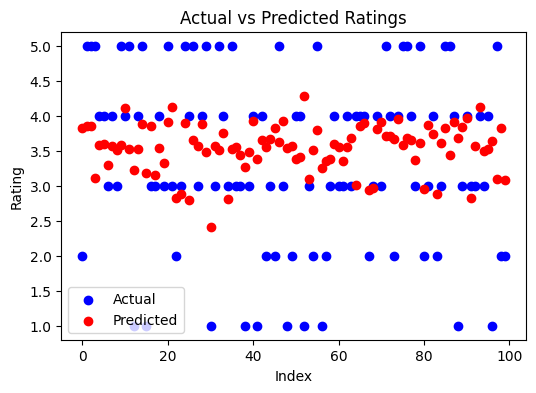

In [39]:
#LR 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
y = data1['rating']
X = data1.drop(columns=['rating'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_head = comparison.head(100).reset_index()
plt.figure(figsize=(6, 4))
plt.scatter(comparison_head.index, comparison_head['Actual'], color='blue', label='Actual')
plt.scatter(comparison_head.index, comparison_head['Predicted'], color='red', label='Predicted')
plt.xlabel('Index')
plt.ylabel('Rating')
plt.title('Actual vs Predicted Ratings')
plt.legend()
plt.show()

Mean Squared Error: 1.1511783663749202


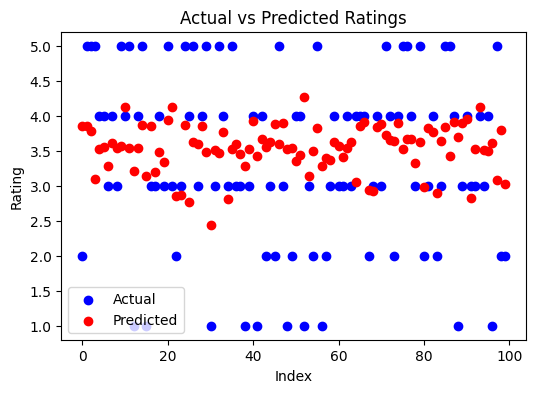

In [41]:
y = data2['rating']
X = data2.drop(columns=['rating'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_head = comparison.head(100).reset_index()
plt.figure(figsize=(6, 4))
plt.scatter(comparison_head.index, comparison_head['Actual'], color='blue', label='Actual')
plt.scatter(comparison_head.index, comparison_head['Predicted'], color='red', label='Predicted')
plt.xlabel('Index')
plt.ylabel('Rating')
plt.title('Actual vs Predicted Ratings')
plt.legend()
plt.show()

Mean Squared Error: 1.1505094752067757


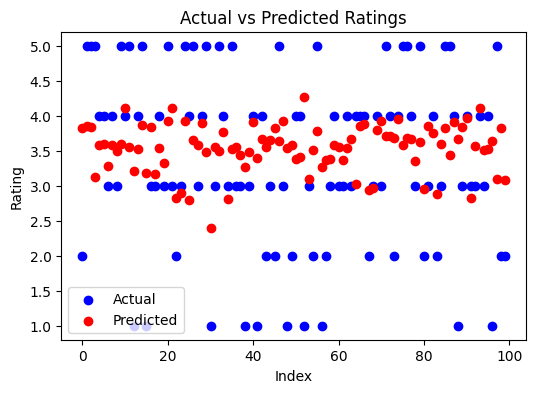

In [42]:
y = data3['rating']
X = data3.drop(columns=['rating'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_head = comparison.head(100).reset_index()
plt.figure(figsize=(6, 4))
plt.scatter(comparison_head.index, comparison_head['Actual'], color='blue', label='Actual')
plt.scatter(comparison_head.index, comparison_head['Predicted'], color='red', label='Predicted')
plt.xlabel('Index')
plt.ylabel('Rating')
plt.title('Actual vs Predicted Ratings')
plt.legend()
plt.show()

Mean Squared Error: 1.1014728420440771


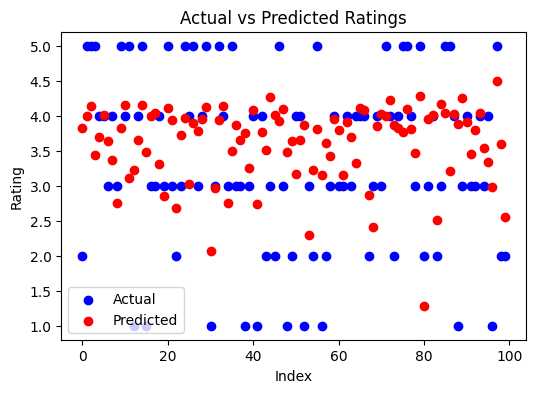

In [44]:
#SVM
from sklearn.svm import SVR
y = data1['rating']
X = data1.drop(columns=['rating'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = SVR(kernel='poly')
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_head = comparison.head(100).reset_index()
plt.figure(figsize=(6, 4))
plt.scatter(comparison_head.index, comparison_head['Actual'], color='blue', label='Actual')
plt.scatter(comparison_head.index, comparison_head['Predicted'], color='red', label='Predicted')
plt.xlabel('Index')
plt.ylabel('Rating')
plt.title('Actual vs Predicted Ratings')
plt.legend()
plt.show()

Mean Squared Error: 1.109374810515157


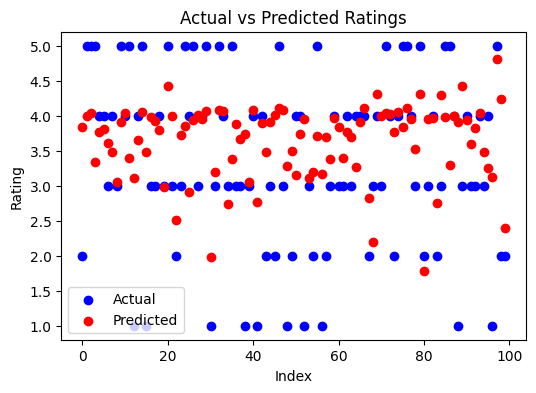

In [4]:
y = data2['rating']
X = data2.drop(columns=['rating'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = SVR(kernel='poly')  
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_head = comparison.head(100).reset_index()
plt.figure(figsize=(6, 4))
plt.scatter(comparison_head.index, comparison_head['Actual'], color='blue', label='Actual')
plt.scatter(comparison_head.index, comparison_head['Predicted'], color='red', label='Predicted')
plt.xlabel('Index')
plt.ylabel('Rating')
plt.title('Actual vs Predicted Ratings')
plt.legend()
plt.show()

Mean Squared Error: 1.1051761930910795


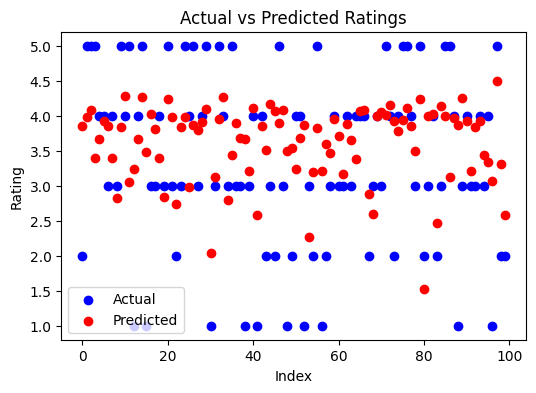

In [6]:
y = data3['rating']
X = data3.drop(columns=['rating'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = SVR(kernel='poly') 
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_head = comparison.head(100).reset_index()
plt.figure(figsize=(6, 4))
plt.scatter(comparison_head.index, comparison_head['Actual'], color='blue', label='Actual')
plt.scatter(comparison_head.index, comparison_head['Predicted'], color='red', label='Predicted')
plt.xlabel('Index')
plt.ylabel('Rating')
plt.title('Actual vs Predicted Ratings')
plt.legend()
plt.show()

Mean Squared Error: 0.9667582204973251


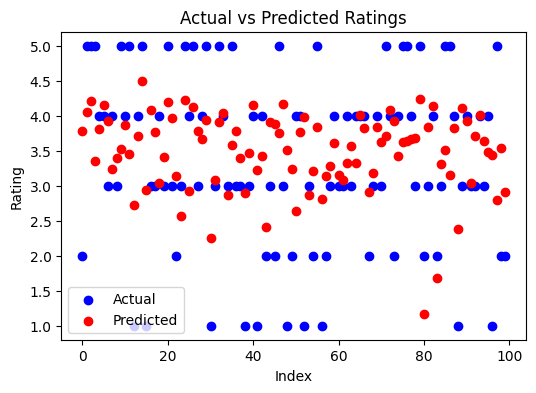

In [18]:
#GBDT
from sklearn.ensemble import GradientBoostingRegressor
y = data1['rating']
X = data1.drop(columns=['rating'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = GradientBoostingRegressor(n_estimators=500)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_head = comparison.head(100).reset_index()
plt.figure(figsize=(6, 4))
plt.scatter(comparison_head.index, comparison_head['Actual'], color='blue', label='Actual')
plt.scatter(comparison_head.index, comparison_head['Predicted'], color='red', label='Predicted')
plt.xlabel('Index')
plt.ylabel('Rating')
plt.title('Actual vs Predicted Ratings')
plt.legend()
plt.show()

Mean Squared Error: 0.9823934375332976


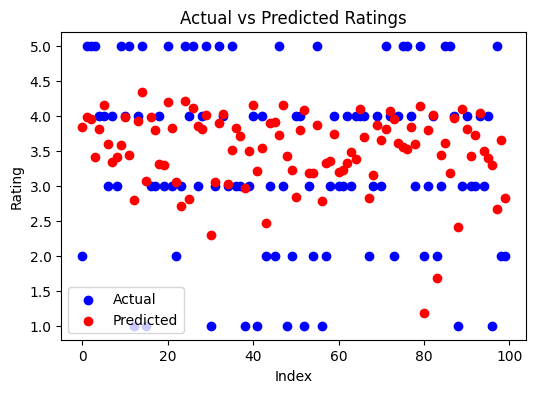

In [17]:
y = data2['rating']
X = data2.drop(columns=['rating'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = GradientBoostingRegressor(n_estimators=500)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_head = comparison.head(100).reset_index()
plt.figure(figsize=(6, 4))
plt.scatter(comparison_head.index, comparison_head['Actual'], color='blue', label='Actual')
plt.scatter(comparison_head.index, comparison_head['Predicted'], color='red', label='Predicted')
plt.xlabel('Index')
plt.ylabel('Rating')
plt.title('Actual vs Predicted Ratings')
plt.legend()
plt.show()

Mean Squared Error: 0.9688326652201468


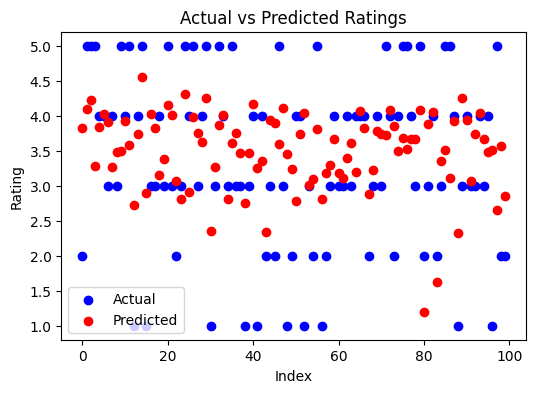

In [16]:
y = data3['rating']
X = data3.drop(columns=['rating'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = GradientBoostingRegressor(n_estimators=500)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_head = comparison.head(100).reset_index()
plt.figure(figsize=(6, 4))
plt.scatter(comparison_head.index, comparison_head['Actual'], color='blue', label='Actual')
plt.scatter(comparison_head.index, comparison_head['Predicted'], color='red', label='Predicted')
plt.xlabel('Index')
plt.ylabel('Rating')
plt.title('Actual vs Predicted Ratings')
plt.legend()
plt.show()

Epoch [10/200], Loss: 3.5704
Epoch [20/200], Loss: 1.8587
Epoch [30/200], Loss: 1.2286
Epoch [40/200], Loss: 1.2296
Epoch [50/200], Loss: 1.1784
Epoch [60/200], Loss: 1.1421
Epoch [70/200], Loss: 1.1283
Epoch [80/200], Loss: 1.1209
Epoch [90/200], Loss: 1.1157
Epoch [100/200], Loss: 1.1117
Epoch [110/200], Loss: 1.1083
Epoch [120/200], Loss: 1.1055
Epoch [130/200], Loss: 1.1031
Epoch [140/200], Loss: 1.1009
Epoch [150/200], Loss: 1.0989
Epoch [160/200], Loss: 1.0970
Epoch [170/200], Loss: 1.0954
Epoch [180/200], Loss: 1.0938
Epoch [190/200], Loss: 1.0924
Epoch [200/200], Loss: 1.0910
Mean Squared Error: 1.1098673301711317


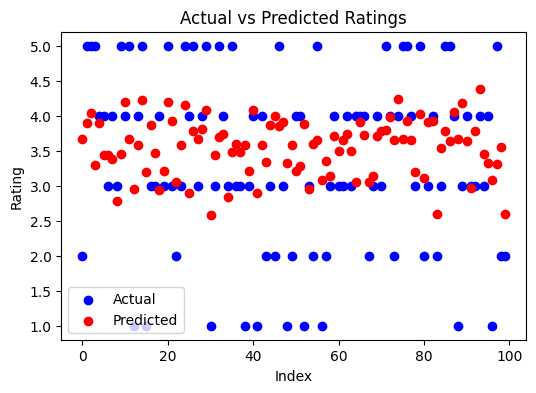

In [20]:
#MLP
import torch.nn as nn
import torch
import torch.optim as optim
y = data1['rating']
X = data1.drop(columns=['rating'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

class MLP(nn.Module):
    def __init__(self, input_dim):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))        
        x = self.fc4(x)
        return x

input_dim = X_train.shape[1]
model = MLP(input_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

num_epochs = 200
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

model.eval()
with torch.no_grad():
    y_pred_tensor = model(X_test_tensor)
    y_pred = y_pred_tensor.numpy()
    y_pred = y_pred.flatten()

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

comparison = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
comparison_head = comparison.head(100).reset_index()

plt.figure(figsize=(6, 4))
plt.scatter(comparison_head.index, comparison_head['Actual'], color='blue', label='Actual')
plt.scatter(comparison_head.index, comparison_head['Predicted'], color='red', label='Predicted')
plt.xlabel('Index')
plt.ylabel('Rating')
plt.title('Actual vs Predicted Ratings')
plt.legend()
plt.show()


Epoch [10/200], Loss: 1.6516
Epoch [20/200], Loss: 1.2918
Epoch [30/200], Loss: 1.2042
Epoch [40/200], Loss: 1.1739
Epoch [50/200], Loss: 1.1531
Epoch [60/200], Loss: 1.1336
Epoch [70/200], Loss: 1.1219
Epoch [80/200], Loss: 1.1168
Epoch [90/200], Loss: 1.1118
Epoch [100/200], Loss: 1.1082
Epoch [110/200], Loss: 1.1050
Epoch [120/200], Loss: 1.1019
Epoch [130/200], Loss: 1.0989
Epoch [140/200], Loss: 1.0956
Epoch [150/200], Loss: 1.0922
Epoch [160/200], Loss: 1.0886
Epoch [170/200], Loss: 1.0852
Epoch [180/200], Loss: 1.0822
Epoch [190/200], Loss: 1.0798
Epoch [200/200], Loss: 1.0778
Mean Squared Error: 1.0964974390258808


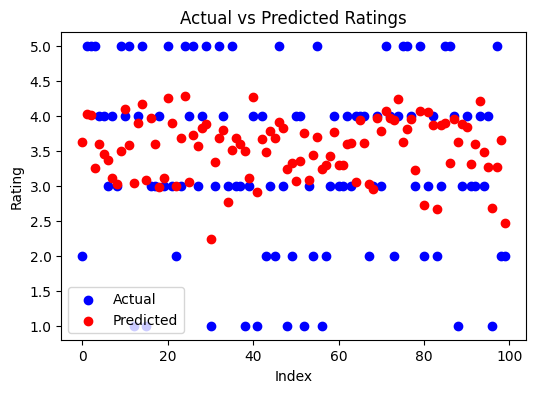

In [22]:
y = data2['rating']
X = data2.drop(columns=['rating'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)
input_dim = X_train.shape[1]
model = MLP(input_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
num_epochs = 200
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
model.eval()
with torch.no_grad():
    y_pred_tensor = model(X_test_tensor)
    y_pred = y_pred_tensor.numpy()
    y_pred = y_pred.flatten()
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
comparison = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
comparison_head = comparison.head(100).reset_index()
plt.figure(figsize=(6, 4))
plt.scatter(comparison_head.index, comparison_head['Actual'], color='blue', label='Actual')
plt.scatter(comparison_head.index, comparison_head['Predicted'], color='red', label='Predicted')
plt.xlabel('Index')
plt.ylabel('Rating')
plt.title('Actual vs Predicted Ratings')
plt.legend()
plt.show()

Epoch [10/200], Loss: 2.0274
Epoch [20/200], Loss: 1.3885
Epoch [30/200], Loss: 1.2096
Epoch [40/200], Loss: 1.1564
Epoch [50/200], Loss: 1.1302
Epoch [60/200], Loss: 1.1245
Epoch [70/200], Loss: 1.1154
Epoch [80/200], Loss: 1.1089
Epoch [90/200], Loss: 1.1051
Epoch [100/200], Loss: 1.1019
Epoch [110/200], Loss: 1.0991
Epoch [120/200], Loss: 1.0968
Epoch [130/200], Loss: 1.0948
Epoch [140/200], Loss: 1.0929
Epoch [150/200], Loss: 1.0911
Epoch [160/200], Loss: 1.0894
Epoch [170/200], Loss: 1.0877
Epoch [180/200], Loss: 1.0860
Epoch [190/200], Loss: 1.0843
Epoch [200/200], Loss: 1.0825
Mean Squared Error: 1.1035022417407947


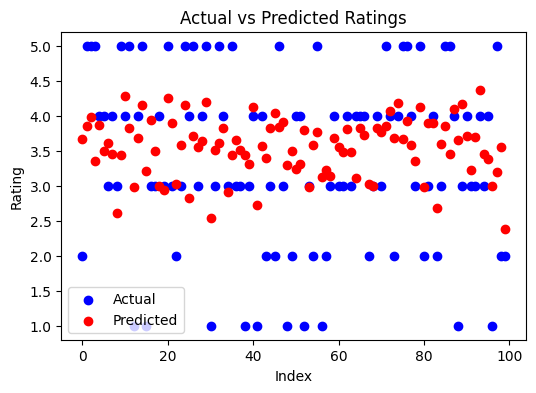

In [23]:
y = data3['rating']
X = data3.drop(columns=['rating'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)
input_dim = X_train.shape[1]
model = MLP(input_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
num_epochs = 200
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
model.eval()
with torch.no_grad():
    y_pred_tensor = model(X_test_tensor)
    y_pred = y_pred_tensor.numpy()
    y_pred = y_pred.flatten()
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
comparison = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
comparison_head = comparison.head(100).reset_index()
plt.figure(figsize=(6, 4))
plt.scatter(comparison_head.index, comparison_head['Actual'], color='blue', label='Actual')
plt.scatter(comparison_head.index, comparison_head['Predicted'], color='red', label='Predicted')
plt.xlabel('Index')
plt.ylabel('Rating')
plt.title('Actual vs Predicted Ratings')
plt.legend()
plt.show()